# Readability Exercise

Welcome! Below you will implement two metrics for evaluating the readability of documents:

1. Flesch–Kincaid readability Grade Index 
2. Gunning Fog Index

The solutions are in [readability_solutions.py](./readability_solutions.py). You can also click the jupyter icon to see all the files in the folder.

To load all the functions in the solutions, simply include `from solutions import *`

## 0. Initialization

Let's read-in our text files. We have three different texts files to play with: 

1. `physics.txt`: taken from a technical wikipedia article about a theoretical physics idea called [Supersymmetry](https://en.wikipedia.org/wiki/Supersymmetry)

2. `APPL_10k_2017.txt`: the 2017 10-K Item IA for APPLE INC, taken from the EDGAR website

3. `alice.txt`: Excerpts from "Alice in Wonderland", the novel is in the public domain and freely available

In [8]:
# download some excerpts from 10-K files

from download10k import get_files

CIK = {'ebay': '0001065088', 'apple':'0000320193', 'sears': '0001310067'}
get_files(CIK['ebay'], 'EBAY')
get_files(CIK['apple'], 'AAPL')
get_files(CIK['sears'], 'SHLDQ')


downloading 10-Ks item 1A for CIK = 0001065088 ...
skipping EBAY_10k_2017.txt
skipping EBAY_10k_2016.txt
skipping EBAY_10k_2015.txt
skipping EBAY_10k_2014.txt
skipping EBAY_10k_2013.txt
downloading 10-Ks item 1A for CIK = 0000320193 ...
skipping AAPL_10k_2017.txt
skipping AAPL_10k_2016.txt
skipping AAPL_10k_2015.txt
skipping AAPL_10k_2014.txt
skipping AAPL_10k_2013.txt
downloading 10-Ks item 1A for CIK = 0001310067 ...
skipping SHLDQ_10k_2017.txt
skipping SHLDQ_10k_2016.txt
skipping SHLDQ_10k_2015.txt
skipping SHLDQ_10k_2014.txt
skipping SHLDQ_10k_2013.txt


In [9]:
# sentences separated by ; are better viewed as multiple sentences
# join combines all the newlines in the file

f = open("physics.txt", "r")
text_phy=''.join(f).replace(';','.')

f = open("alice.txt", "r")
text_alice=''.join(f).replace(';','.')

f = open("AAPL_10k_2017.txt", "r")
text_10k=''.join(f).replace(';','.')



In [10]:
# check out some of the texts
print(text_10k[:500]+"...\n")
print(text_phy[:500]+"...\n")
print(text_alice[:500]+"...\n")

The following discussion of risk factors contains forward-looking statements. These risk factors may be important to understanding other statements in this Form 10-K. The following information should be read in conjunction with Part II, Item 7, “Management’s Discussion and Analysis of Financial Condition and Results of Operations” and the consolidated financial statements and related notes in Part II, Item 8, “Financial Statements and Supplementary Data” of this Form 10-K. The business, financia...

In particle physics, supersymmetry (SUSY) is a principle that proposes a relationship between two basic classes of elementary particles: bosons, which have an integer-valued spin, and fermions, which have a half-integer spin. A type of spacetime symmetry, supersymmetry is a possible candidate for undiscovered particle physics, and seen as an elegant solution to many current problems in particle physics if confirmed correct, which could resolve various areas where current theories are believ

## 1. Pre-processing
Here, we need to define functions that can split our texts into sentences, and split our sentences into words

In [13]:
# tokenize and clean the text
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from collections import Counter
from nltk.corpus import stopwords

from nltk import word_tokenize
from syllable_count import syllable_count


nltk.download('wordnet')

sno = SnowballStemmer('english')
wnl = WordNetLemmatizer()

from nltk.tokenize import RegexpTokenizer

# tokenizer that selects out non letter and non symbol (i.e. all alphabets)
word_tokenizer = RegexpTokenizer(r'[^\d\W]+')


def word_tokenize(sent):
    return [ w for w in word_tokenizer.tokenize(sent) if w.isalpha() ]

# for the sentence tokenizer
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# you can tokenize sentences by calling
#sent_tokenize(text_10k)

# and tokenize words by calling
#word_tokenize(text_10k)

# syllable_count counts the number of syllables in a word
# it's included in syllable_count.py

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The',
 'following',
 'discussion',
 'of',
 'risk',
 'factors',
 'contains',
 'forward',
 'looking',
 'statements',
 'These',
 'risk',
 'factors',
 'may',
 'be',
 'important',
 'to',
 'understanding',
 'other',
 'statements',
 'in',
 'this',
 'Form',
 'K',
 'The',
 'following',
 'information',
 'should',
 'be',
 'read',
 'in',
 'conjunction',
 'with',
 'Part',
 'II',
 'Item',
 'Management',
 's',
 'Discussion',
 'and',
 'Analysis',
 'of',
 'Financial',
 'Condition',
 'and',
 'Results',
 'of',
 'Operations',
 'and',
 'the',
 'consolidated',
 'financial',
 'statements',
 'and',
 'related',
 'notes',
 'in',
 'Part',
 'II',
 'Item',
 'Financial',
 'Statements',
 'and',
 'Supplementary',
 'Data',
 'of',
 'this',
 'Form',
 'K',
 'The',
 'business',
 'financial',
 'condition',
 'and',
 'operating',
 'results',
 'of',
 'the',
 'Company',
 'can',
 'be',
 'affected',
 'by',
 'a',
 'number',
 'of',
 'factors',
 'whether',
 'currently',
 'known',
 'or',
 'unknown',
 'including',
 'but',
 'not',
 

In [5]:
??sent_tokenize()

Now implement three functions

1. `sentence_count`: a simple function that returns the number of sentences in a document

2. `word_count`: a simple function that returns the number of words in a sentence

3. `hard_word_count`: a simple function that returns the number of words with more than 3 syllables, while removing suffixes like "-ed", and "-ing". This can be done by lemmatizing the word, i.e. `wnl.lemmatize(word, pos='v')`

the function `word_tokenize(sentence)` will be useful here

In [14]:
def sentence_count(text):
    return len(sent_tokenize(text))

def word_count(sent):
    return len(word_tokenize(sent))

def word_count2(sent):
    return len([ w for w in word_tokenize(sent)])

def hard_word_count(sent):
    return len([w for w in word_tokenize(sent) if syllable_count(wnl.lemmatize(w, pos='v'))>3])

In [17]:
print (word_count(text_10k))
print (word_count2(text_10k))

7765
7765


## 2. Readability Grade-Levels

Here, you will implement the two readability indices (grade levels). They are defined by

\begin{align}
\textrm{Flesch–Kincaid Grade} 
= 0.39 \left(
\frac{\textrm{Number of words}}{\textrm{Number of sentences}}
\right) \\
+11.8
\left(
\frac{\textrm{Number of syllables}}{\textrm{Number of words}}
\right)
-15.59
\end{align}

and

\begin{align}
\textrm{Gunning-Fog Grade} 
=\; &0.4 \bigg[ 
\left(
\frac{\textrm{Number of words}}{\textrm{Number of sentences}}
\right) 
+100
\left(
\frac{\textrm{Number of hard words}}{\textrm{Number of words}}
\right)
\bigg]
\end{align}

To count syllables, we've added a syllable_count function you can access via 

```
from syllable_count import syllable_count
syllable_count("syllable")
```

Below, implement the function `flesch_index` and `fog_index` that computes the readability grade level for a given text.

In [34]:
import numpy as np

def flesch_index(text):
    sents = sent_tokenize(text)
    
    num_sent = len(sents)
    num_word = np.sum( [word_count(s) for s in sents] )
    num_syll = np.sum( [np.sum([ syllable_count(w) for w in word_tokenize(s)]) for s in sents])
    
    #print(num_sent, num_word,num_syll)
    return 0.39 *(num_word/num_sent) + 11.8 *(num_syll/num_word) - 15.59

def fog_index(text):
    sents = sent_tokenize(text)
    num_sent = len(sents)
    num_word = np.sum( [word_count(s) for s in sents] )
    num_hardword = np.sum([hard_word_count(s) for s in sents])
    
    return 0.4*(num_word/num_sent + 100*num_hardword/num_word)
    
    
    

In [39]:
def flesch_index_sol(text):
    sentences = sent_tokenize(text)

    total_sentences = len(sentences)
    total_words = np.sum([ word_count(s) for s in sentences ])
    total_syllables = np.sum([ np.sum([ syllable_count(w) for w in word_tokenize(s) ]) \
                              for s in sentences ])
    #print(total_sentences, total_words,total_syllables)
    return 0.39*(total_words/total_sentences) + \
            11.8*(total_syllables/total_words) - 15.59

def fog_index_sol(text):
    sentences = sent_tokenize(text)

    total_sentences = len(sentences)
    total_words = np.sum([ word_count(s) for s in sentences ])
    total_hard_words = np.sum([ hard_word_count(s) for s in sentences ])
    
    return 0.4*((total_words/total_sentences) + \
            100.0*(total_hard_words/total_words))

## 3 Results

Now that you've coded up the exercises, compute the grade levels for each of the texts given.


In [37]:
# to test the solutions
# uncommon next line
# from readability_solutions import *

print(flesch_index(text_alice),fog_index(text_alice))
print(flesch_index(text_phy),fog_index(text_phy))
print(flesch_index(text_10k),fog_index(text_10k))

7.78094652406 8.80926916221
16.3171712123 14.1211909182
18.2108288106 15.1377529961


In [40]:
print(flesch_index_sol(text_alice),fog_index_sol(text_alice))
print(flesch_index_sol(text_phy),fog_index_sol(text_phy))
print(flesch_index_sol(text_10k),fog_index_sol(text_10k))

7.78094652406 8.80926916221
16.3171712123 14.1211909182
18.2108288106 15.1377529961


You should expect a grade level around 7-10 for `alice.txt`, and around 16-19 for `physics.txt`, and 18+ for financial documents! 

It turns out 10-Ks are really *hard* to read legal documents!
Now, let's compute the readability for all the 10-Ks we have

In [43]:
filelist_10k=!ls *10k*txt


flesch = []
fog = []

for file in filelist_10k:
    with open(file, 'r') as f:
        text=''.join(f).replace(';','.')
        flesch.append(flesch_index(text))
        fog.append(fog_index(text))
        print(file, flesch[-1],fog[-1])

AAPL_10k_2013.txt 18.1336596757 15.0210558069
AAPL_10k_2014.txt 18.1536894665 15.0452568964
AAPL_10k_2015.txt 18.2144706379 15.1336794535
AAPL_10k_2016.txt 18.2620196893 15.1672769995
AAPL_10k_2017.txt 18.2108288106 15.1377529961
EBAY_10k_2013.txt 17.2088261149 14.7273806801
EBAY_10k_2014.txt 17.522305957 15.0205481603
EBAY_10k_2015.txt 17.1741438469 14.6446254383
EBAY_10k_2016.txt 16.8119978036 14.5519984111
EBAY_10k_2017.txt 16.988036714 14.7184534408
SHLDQ_10k_2013.txt 16.8126305116 14.7104733162
SHLDQ_10k_2014.txt 17.1138126995 15.0834960038
SHLDQ_10k_2015.txt 18.304118527 16.2707502981
SHLDQ_10k_2016.txt 18.7321020854 16.6680750129
SHLDQ_10k_2017.txt 17.755571973 15.4991194556


Superficially, and according to our readability metrics, reading 10-Ks is harder than reading articles on theoretical physics!

# Bonus exercise:
How are the two readability grade-levels correlated? Compute the covariance matrix of the two readability indices we have on all the 10K documents, and make a scatter plot of Flesch index vs Fog index. Also perform a least-squared fit to the result and plot it as well.

(change bottom cell to code and remove html tags for solution)

[[ 0.40312929  0.27996621]
 [ 0.27996621  0.3501103 ]]
[ 16.5    16.525  16.55   16.575  16.6    16.625  16.65   16.675  16.7
  16.725  16.75   16.775  16.8    16.825  16.85   16.875  16.9    16.925
  16.95   16.975  17.     17.025  17.05   17.075  17.1    17.125  17.15
  17.175  17.2    17.225  17.25   17.275  17.3    17.325  17.35   17.375
  17.4    17.425  17.45   17.475  17.5    17.525  17.55   17.575  17.6
  17.625  17.65   17.675  17.7    17.725  17.75   17.775  17.8    17.825
  17.85   17.875  17.9    17.925  17.95   17.975  18.     18.025  18.05
  18.075  18.1    18.125  18.15   18.175  18.2    18.225  18.25   18.275
  18.3    18.325  18.35   18.375  18.4    18.425  18.45   18.475  18.5
  18.525  18.55   18.575  18.6    18.625  18.65   18.675  18.7    18.725
  18.75   18.775  18.8    18.825  18.85   18.875  18.9    18.925  18.95
  18.975  19.   ]


Text(0,0.5,'Fog Index')

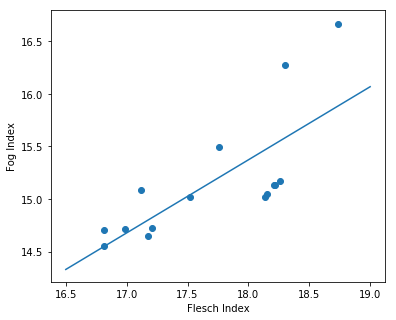

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

cov = np.cov(flesch, fog)
print(cov)

%matplotlib inline

plt.figure(figsize= (6,5))
plt.scatter(flesch,fog)

slope, intercept, r_value, p_value, std_err = linregress(flesch, fog)

x=np.linspace(16.5,19,101)
#print(x)
y=slope*x+intercept
plt.plot(x,y)

plt.xlabel("Flesch Index")
plt.ylabel("Fog Index")

In [ ]:


#solution
cov = np.cov(flesch,fog)
print(cov)

%matplotlib inline

plt.figure(figsize=(6,5))
plt.scatter(flesch,fog) 

slope, intercept, r_value, p_value, std_err = linregress(flesch, fog)

x=np.linspace(16.5,19,101)
y=slope*x+intercept
plt.plot(x,y)

plt.xlabel("Flesch Index")
plt.ylabel("Fog Index")
